# <font color='#eb3483'> COMPAS ANALYSIS </font>


Our group analyzed the COMPAS Dataset to understand criminal recidivism more clearly.

We hypothesized that a machine learning analysis of the COMPAS Two-Year Excel Spreadsheets would describe a higher likelihood of African-American surveyors 

In [455]:
import pandas as pd
import numpy as np
df = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv') 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(6,5)}) 
%matplotlib inline

## <font color='#eb3483'> Introduction </font>


### <font color='#eb3483'> Understanding the Initial Dataset </font>

In [456]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
0,69,0,1,0,0,0,-1.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34,0,3,0,0,0,-1.000000,1,1,3,...,0,0,0,1,0,0,0,0,0,0
2,24,0,4,0,1,4,-1.000000,1,0,4,...,0,0,0,0,0,0,0,0,0,0
3,23,0,8,1,0,1,3.304763,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4,43,0,1,0,0,2,3.304763,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [457]:
df.tail()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
7209,23,0,7,0,0,0,-1.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
7210,23,0,3,0,0,0,-1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
7211,57,0,1,0,0,0,-1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7212,33,0,2,0,0,3,-1.0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7213,23,0,4,0,0,2,-2.0,1,0,4,...,0,0,0,0,0,0,0,0,0,0


In [458]:
df.shape

(7214, 45)

In [459]:
df.columns

Index(['age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'is_violent_recid', 'decile_score.1', 'v_decile_score',
       'priors_count.1', 'start', 'end', 'event', 'two_year_recid',
       'sex_Female', 'sex_Male', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M', 'r_charge_degree_(CO3)',
       'r_charge_degree_(F1)', 'r_charge_degree_(F2)', 'r_charge_degree_(F3)',
       'r_charge_degree_(F5)', 'r_charge_degree_(F6)', 'r_charge_degree_(F7)',
       'r_charge_degree_(M1)', 'r_charge_degree_(M2)', 'r_charge_degree_(MO3)',
       'vr_charge_degree_(F1)', 'vr_charge_degree_(F2)',
       'vr_charge_degree_(F3)', 'vr_charge_degree_(F5)',
       'vr_charge_degree_(F6)', 'vr_charge_degree_(F7)',
       'vr_charge_degree_(M1)', 'vr_charge_degree_(M2)',
       'vr_charge_degree_(MO3)'

In [460]:
df.dtypes

age                          int64
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
is_recid                     int64
is_violent_recid             int64
decile_score.1               int64
v_decile_score               int64
priors_count.1               int64
start                        int64
end                          int64
event                        int64
two_year_recid               int64
sex_Female                   int64
sex_Male                     int64
race_African-American        int64
race_Asian                   int64
race_Caucasian               int64
race_Hispanic                int64
race_Native American         int64
race_Other                   int64
c_charge_degree_F            int64
c_charge_degree_M            int64
r_charge_degree_(CO3)        int64
r_charge_degree_(F1)         int64
r_charge_degree_(F2)

In [461]:
import scipy.stats as stats

### <font color='#eb3483'> Unnecessary/Duplicate Column Removal </font>

In [418]:
del_col_list = ['r_days_from_arrest','c_days_from_compas','violent_recid','id', 'c_case_number','r_case_number', 'vr_case_number','name', 'first', 'last', 'compas_screening_date', 'dob', 'age_cat', 'c_jail_in','c_jail_out', 'c_offense_date', 'c_arrest_date', 'c_charge_desc', 'r_case_number', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody'] 

df = df.drop(del_col_list, axis=1)
df.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,...,r_charge_degree,is_violent_recid,vr_charge_degree,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
0,Male,69,Other,0,1,0,0,0,-1.0,F,...,NaN,0,NaN,1,1,0,0,327,0,0
1,Male,34,African-American,0,3,0,0,0,-1.0,F,...,(F3),1,(F3),3,1,0,9,159,1,1
2,Male,24,African-American,0,4,0,1,4,-1.0,F,...,(M1),0,NaN,4,3,4,0,63,0,1
3,Male,23,African-American,0,8,1,0,1,NaN,F,...,NaN,0,NaN,8,6,1,0,1174,0,0
4,Male,43,Other,0,1,0,0,2,NaN,F,...,NaN,0,NaN,1,1,2,0,1102,0,0


In [419]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(7214, 21)
(1, 21)


In [420]:
df = pd.get_dummies(data=df, columns=["sex", "race", "c_charge_degree", "r_charge_degree", "vr_charge_degree"])

In [421]:
df.days_b_screening_arrest = df.days_b_screening_arrest.fillna(df.days_b_screening_arrest.mean())

In [423]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
0,69,0,1,0,0,0,-1.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34,0,3,0,0,0,-1.000000,1,1,3,...,0,0,0,1,0,0,0,0,0,0
2,24,0,4,0,1,4,-1.000000,1,0,4,...,0,0,0,0,0,0,0,0,0,0
3,23,0,8,1,0,1,3.304763,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4,43,0,1,0,0,2,3.304763,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## <font color='#eb3483'> Understanding The Top Offenders </font>

In [424]:
top_reoffenders = df.sort_values(by ='priors_count', ascending=False).head()
top_reoffenders

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
6825,45,0,8,0,0,38,-1.0,1,1,8,...,0,0,0,1,0,0,0,0,0,0
2058,58,0,7,0,0,38,-112.0,1,0,7,...,0,0,0,0,0,0,0,0,0,0
2186,38,0,7,5,0,37,-1.0,1,1,7,...,0,0,0,1,0,0,0,0,0,0
328,53,0,6,0,0,36,-7.0,1,0,6,...,0,0,0,0,0,0,0,0,0,0
4374,39,0,10,0,0,35,-45.0,0,0,10,...,0,0,0,0,0,0,0,0,0,0


In [425]:
def find_min_max_in(col):
    top = df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('priors_count')

,2058,0
age,58.0,69.0
juv_fel_count,0.0,0.0
decile_score,7.0,1.0
juv_misd_count,0.0,0.0
juv_other_count,0.0,0.0
priors_count,38.0,0.0
days_b_screening_arrest,-112.0,-1.0
is_recid,1.0,0.0
is_violent_recid,0.0,0.0
decile_score.1,7.0,1.0


### <font color='#eb3483'> Linear Regression </font>

In [426]:
y=df['priors_count']
X=df.drop('priors_count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [427]:
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (5771, 44)
y train (5771,)
X test (1443, 44)
y test (1443,)


In [428]:
from sklearn.linear_model import LinearRegression

In [429]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [430]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [431]:
model.fit(y=y_train, X=X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [432]:
model.intercept_

1.5232259897857148e-13

In [433]:
model.coef_

array([-3.73290028e-15,  1.70017593e-14, -2.92257291e-15,  1.11463166e-16,
       -8.34049485e-17, -2.25558049e-16, -6.37084975e-15, -7.82855428e-16,
       -3.21443647e-15,  1.22617250e-15,  1.00000000e+00, -2.99465952e-16,
        1.28112571e-17,  4.74161594e-16,  7.81677052e-16,  5.00309560e-16,
       -4.82962325e-16,  4.30700268e-16,  2.57822635e-17, -2.34785304e-16,
        1.15087359e-16, -6.46506902e-17, -2.60110314e-16,  8.59551210e-17,
       -8.59551210e-17, -3.11205634e-16, -3.02498607e-16, -5.39094740e-16,
       -9.72475481e-16, -2.94786173e-16, -1.10671039e-15, -1.43585555e-15,
       -7.21607526e-16, -6.98314950e-16, -3.01046349e-16, -3.07230089e-16,
        1.29509565e-17,  4.30807260e-18, -2.94596438e-16,  4.01205565e-16,
        1.96933245e-17, -3.18020075e-16, -2.48683499e-16, -2.09845315e-16])

In [434]:
predictions = model.predict(X_test)

In [435]:
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 0.000 Estimated value: -0.00000
Real value: 6.000 Estimated value: 6.00000
Real value: 1.000 Estimated value: 1.00000
Real value: 0.000 Estimated value: 0.00000
Real value: 7.000 Estimated value: 7.00000


In [436]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3),target,prediction
0,942,45,0,5,0,0,-3.0,1,0,5,...,0,0,0,0,0,0,0,0,0,-4.470689e-14
1,5750,25,0,7,0,0,24.0,1,0,7,...,0,0,0,0,0,0,0,0,6,6.000000e+00
2,3250,68,0,2,0,0,-37.0,0,0,2,...,0,0,0,0,0,0,0,0,1,1.000000e+00
3,5730,38,0,1,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.011785e-14
4,7164,31,1,9,0,0,-1.0,1,0,9,...,0,0,0,0,0,0,0,0,7,7.000000e+00


In [437]:
type(X)

pandas.core.frame.DataFrame

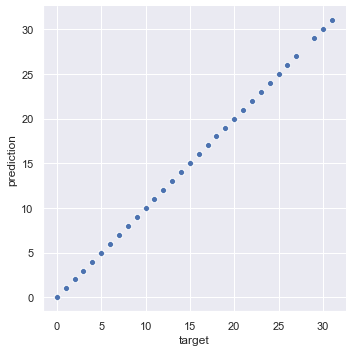

In [438]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")

## <font color='#eb3483'> Logistical Regression </font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
sns.pairplot(df)

In [ ]:
from ipywidgets import interact, fixed

#Create our plotting function
def plotRecidivismPercent(df, col):
    #Check out what average recidivism is for each potential value in a collumn
    df.groupby(col).agg({'Two_yr_Recidivism':np.mean}).plot.barh()

#Let's look at all columns (you might want to drop numeric columns 
#that aren't binary but you can also just ignore that graph)
columns_to_plot = df.drop('Two_yr_Recidivism',axis=1).columns
interact(plotRecidivismPercent, 
         col=columns_to_plot, df1=fixed(df));

In [ ]:
#Get our data into the right format
X = df.drop('Two_yr_Recidivism', axis=1)
Y = df['Two_yr_Recidivism']
X_tr, X_test, Y_tr, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
Y_tr

In [ ]:
#Instantiate our logistic regression model
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
predictions = logreg.predict(X_test)

predictions[:10]

In [ ]:
#Check accuracy
print("Accuracy: ", (predictions == Y_test).mean())

In [ ]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="accuracy", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="roc_auc", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']:
    predictions = logreg.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())